# Pemahaman Data (data understanding)

## Pemahaman data
Proses tahap awal dalam proses analisis data yang bertujuan untuk memperoleh wawasan dan pemahaman mendalam mengenai data yang tersedia, data yang saya gunakan di sini yaitu CDC Diabetes Health Indicators Kumpulan Data Indikator Kesehatan Diabetes yang berisikan statistik layanan kesehatan dan informasi survei gaya hidup tentang orang-orang secara umum beserta diagnosis diabetes mereka. 35 fitur tersebut terdiri dari beberapa demografi, hasil tes lab, dan jawaban pertanyaan survei untuk setiap pasien. Variabel target klasifikasi adalah apakah pasien menderita diabetes, pra-diabetes, atau sehat.

## tujuan
Data ini bertujuan untuk lebih memahami hubungan antara gaya hidup dan diabetes

## pengumpulan data
data ini diambil dari UCI dataset,cara mengambilnya yaitu bisa dilakukan dengan kode di bawah

In [ ]:
#hal pertama yang harus dilakukan yaitu menginstal library terlebih dahulu
!pip install ucimlrepo


[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: pip install --upgrade pip


In [16]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from ucimlrepo import fetch_ucirepo
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

kode di atas adalah library yang dibutuhkan selamam mengeksekusi data, kemudian setelahnya ambil data dari dataset dan dijadikan csv(optional)

In [15]:
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# Data (as pandas dataframes) 
data = cdc_diabetes_health_indicators.data.original

# Menyimpan hasil komputasi ke dalam csv
data.to_csv("cdc_diabetes_health_indicators.csv", index=True)

In [17]:
print(data.head())

   ID  Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0   0                0       1         1          1   40       1       0   
1   1                0       0         0          0   25       1       0   
2   2                0       1         1          1   28       0       0   
3   3                0       1         0          1   27       0       0   
4   4                0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  ...  AnyHealthcare  NoDocbcCost  \
0                     0             0  ...              1            0   
1                     0             1  ...              0            1   
2                     0             0  ...              1            1   
3                     0             1  ...              1            0   
4                     0             1  ...              1            0   

   GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  
0        5        18      

di atas adalah isi dari dataset

## tentang data
pada data terdapat kolom sebegaai berikut:
- **Diabetes_binary**: Status diabetes (0 = tidak ada diabetes, 1 = pradiabetes atau diabetes)
- **HighBP**: Tekanan darah tinggi (0 = tidak ada tekanan darah tinggi, 1 = tekanan darah tinggi)
- **HighChol**: Kolesterol tinggi (0 = tidak ada kolesterol tinggi, 1 = kolesterol tinggi)
- **CholCheck**: Pemeriksaan kolesterol dalam 5 tahun terakhir (0 = tidak, 1 = ya)
- **BMI**: Indeks Massa Tubuh (IMT)
- **Smoker**: Pernah merokok setidaknya 100 batang rokok dalam seumur hidup (0 = tidak, 1 = ya)
- **Stroke**: Pernah diberitahu memiliki stroke (0 = tidak, 1 = ya)
- **HeartDiseaseorAttack**: Penyakit jantung koroner (CHD) atau serangan jantung (MI) (0 = tidak, 1 = ya)
- **PhysActivity**: Aktivitas fisik dalam 30 hari terakhir - tidak termasuk pekerjaan (0 = tidak, 1 = ya)
- **Fruits**: Mengonsumsi buah 1 kali atau lebih per hari (0 = tidak, 1 = ya)
- **Veggies**: Mengonsumsi sayuran 1 kali atau lebih per hari (0 = tidak, 1 = ya)
- **HvyAlcoholConsump**: Konsumsi alkohol berat (pria dewasa yang minum lebih dari 14 minuman per minggu dan wanita dewasa yang minum lebih dari 7 minuman per minggu) (0 = tidak, 1 = ya)
- **AnyHealthcare**: Memiliki jenis perlindungan kesehatan apa pun, termasuk asuransi kesehatan, rencana prabayar seperti HMO, dll. (0 = tidak, 1 = ya)
- **NoDocbcCost**: Pernah ada waktu dalam 12 bulan terakhir ketika Anda perlu menemui dokter tetapi tidak bisa karena biaya? (0 = tidak, 1 = ya)
- **GenHlth**: Bagaimana Anda mengatakan kesehatan umum Anda: skala 1-5 (1 = sangat baik, 2 = baik, 3 = cukup, 4 = kurang baik, 5 = buruk)
- **MentHlth**: Sekarang berpikir tentang kesehatan mental Anda, yang meliputi stres, depresi, dan masalah dengan emosi, berapa hari selama 30 hari terakhir kesehatan mental Anda tidak baik? (skala 1-30 hari)
- **PhysHlth**: Sekarang berpikir tentang kesehatan fisik Anda, yang meliputi penyakit fisik dan cedera, berapa hari selama 30 hari terakhir kesehatan fisik Anda tidak baik? (skala 1-30 hari)
- **DiffWalk**: Apakah Anda memiliki kesulitan serius untuk berjalan atau naik tangga? (0 = tidak, 1 = ya)
- **Sex**: Jenis kelamin (0 = perempuan, 1 = laki-laki)
- **Age**: Usia
- **Education**: Tingkat pendidikan (EDUCA lihat buku kode) skala 1-6 
  - 1 = Tidak pernah sekolah atau hanya taman kanak-kanak
  - 2 = Kelas 1 hingga 8 (SD)
  - 3 = Kelas 9 hingga 11 (Beberapa sekolah menengah)
  - 4 = Kelas 12 atau GED (Lulusan sekolah menengah)
  - 5 = Perguruan tinggi 1 tahun hingga 3 tahun (Beberapa perguruan tinggi atau sekolah teknis)
  - 6 = Perguruan tinggi 4 tahun atau lebih (Lulusan perguruan tinggi)
- **Income**: Skala pendapatan (INCOME2 lihat buku kode) skala 1-8 
  - 1 = kurang dari Rp150.000.000
  - 5 = kurang dari Rp525.000.000
  - 8 = Rp1.125.000.000 atau lebih


mencari tahu terdapat berapa jumlah data pada masing masing penderita diabetes pada data

In [ ]:
data.groupby('Diabetes_binary').size()

Diabetes_binary
0    218334
1     35346
dtype: int64

pada kode di atas dapat kita ketahui bahwa terdapat 35346 penderita diabetes dan 218334 tidak, dan dari kode tersebut kita tahu bahwa sanya data berjumlah 253.680

# Pemrosesan awal data (Preprocessing )

## pemrosesan data
metode yang digunakan untuk mengubah, membersihkan, dan mempersiapkan data mentah menjadi format yang dapat digunakan untuk analisis lebih lanjut atau pemodelan.

## Pembersihan data
terdapat 3 data yang bisa dihapus yaitu ketika terdapat:
- missing value
- data duplikat
- outlier

memeriksa apakah terdapat missing value pada data

In [ ]:
# Melakukan pengecekan apakah terdapat missing value dalam setiap kolom
missing_val = data.isnull().sum()

# Menampilkan berapa jumlah adanya missing value untuk setiap kolomnya
print("Jumlah nilai yang hilang untuk setiap kolom:")
print(missing_val)

# Melakukan pengecekan apakah ada nilai null atau missing value
if missing_val.sum() == 0:
    print("Tidak ada missing value.")
else:
    print("Terdapat missing value dalam dataset.")


Jumlah nilai yang hilang untuk setiap kolom:
Unnamed: 0              0
ID                      0
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Tidak ada missing value.


dapat dilihat dari output diatas bahwa tidak ada missing value, karena tidak terdapat missing value pada data maka tidak perlu dilakukan penghapusan data

setelahnya yaitu melakukan apakah terdapat duplikat pada data

In [ ]:
# Mencari data duplikat
duplicate_rows = data[data.duplicated()]

# Menampilkan data duplikat jika ada
if not duplicate_rows.empty:
    print("Data duplikat yang ditemukan:")
    print(duplicate_rows)
else:
    print("Tidak ada data duplikat dalam dataset.")

Tidak ada data duplikat dalam dataset.


tidak ada data yang duplikat pada data ini jadi tidak perlu dilakukan penghapusan data

setelahnya mencari outlier pada data

Untuk mendapatkan model yang paling akurat dan tidak membebani model dengan informasi yang tidak penting, kami hanya ingin mempertahankan fitur yang paling relevan. Kami akan memfilter fitur dan mempertahankan fitur yang memiliki korelasi lebih besar atau sama dari 0,2 dengan target. Target dalam kasus kami adalah kolom "Diabetes_binary". Untuk alasan yang sama, untuk fitur yang paling relevan, kami akan memeriksa keberadaan outlier dan menghapusnya.

In [ ]:
features = data.corr()['Diabetes_binary'].sort_values()
features

Income                 -0.163919
Education              -0.124456
PhysActivity           -0.118133
HvyAlcoholConsump      -0.057056
Veggies                -0.056584
Fruits                 -0.040779
Unnamed: 0              0.004268
ID                      0.004268
AnyHealthcare           0.016255
Sex                     0.031430
NoDocbcCost             0.031433
Smoker                  0.060789
CholCheck               0.064761
MentHlth                0.069315
Stroke                  0.105816
PhysHlth                0.171337
HeartDiseaseorAttack    0.177282
Age                     0.177442
HighChol                0.200276
BMI                     0.216843
DiffWalk                0.218344
HighBP                  0.263129
GenHlth                 0.293569
Diabetes_binary         1.000000
Name: Diabetes_binary, dtype: float64

In [ ]:
high_corr_features = features[features >= 0.2].index
high_corr_features

Index(['HighChol', 'BMI', 'DiffWalk', 'HighBP', 'GenHlth', 'Diabetes_binary'], dtype='object')

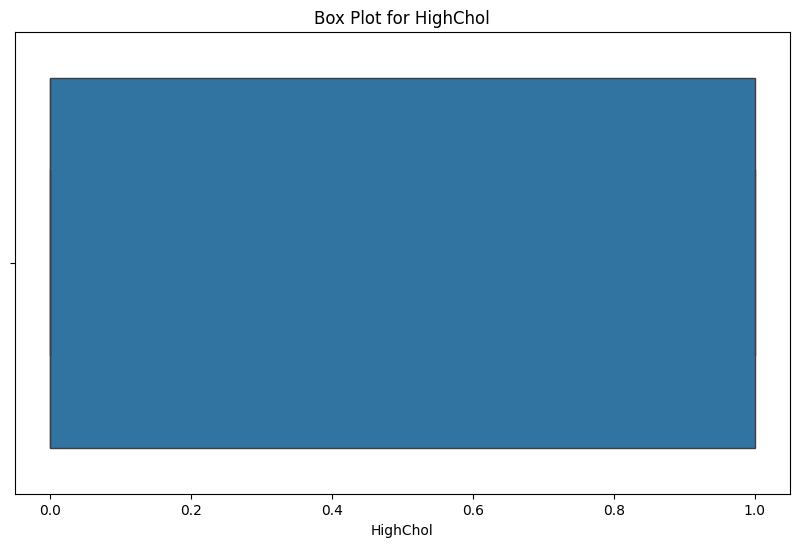

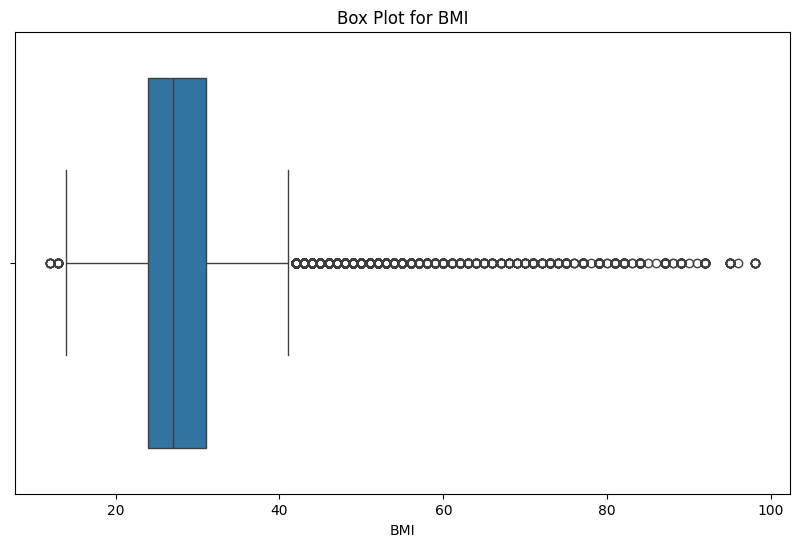

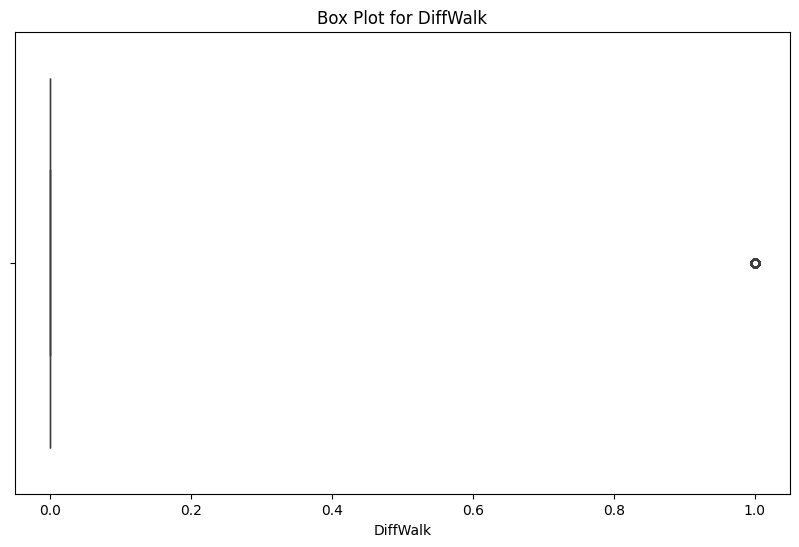

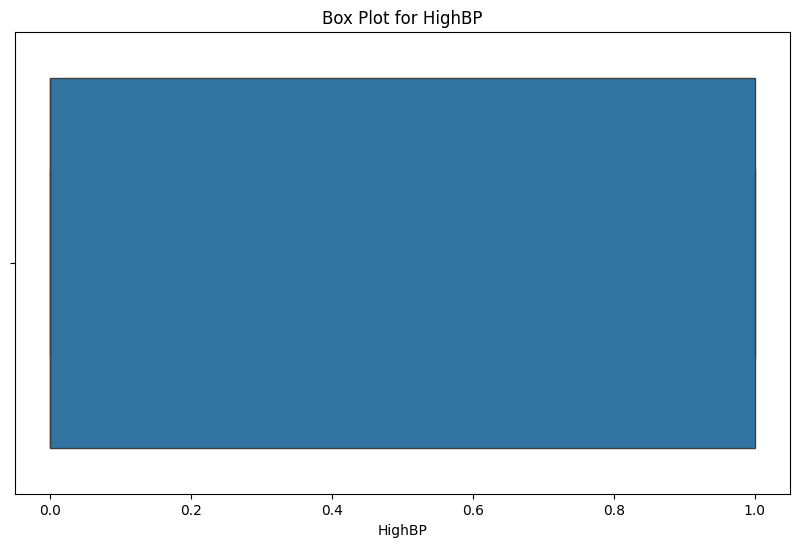

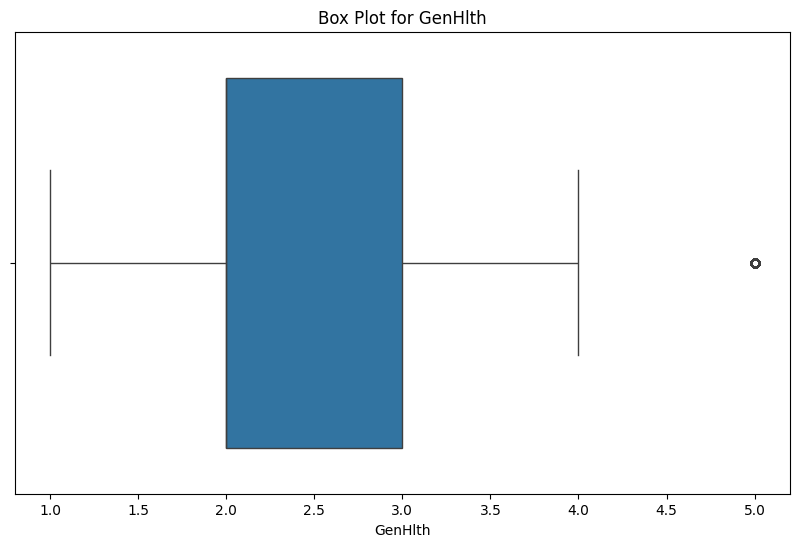

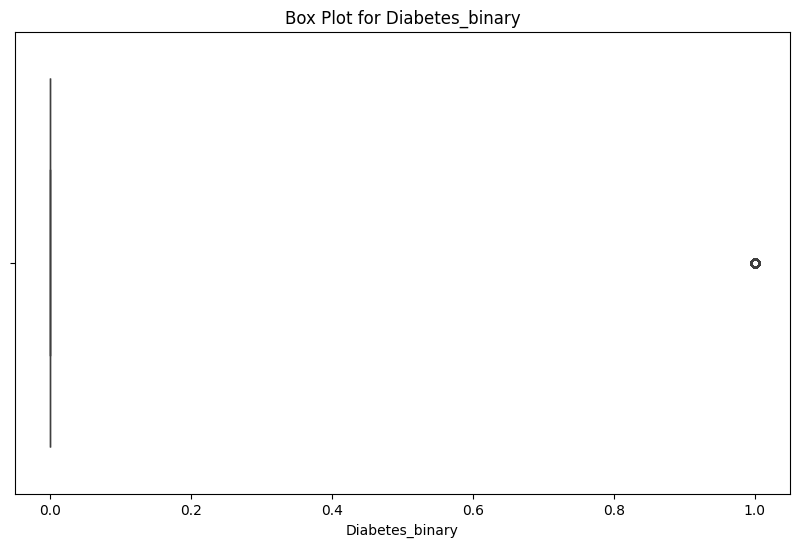

Jumlah outlier di kolom HighChol: 0
Jumlah outlier di kolom BMI: 9847
Jumlah outlier di kolom DiffWalk: 42675
Jumlah outlier di kolom HighBP: 0
Jumlah outlier di kolom GenHlth: 12081
Jumlah outlier di kolom Diabetes_binary: 35346


In [ ]:
for column in high_corr_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Deteksi outlier untuk setiap kolom
outlier_counts = {}
for col in high_corr_features:
    outliers = detect_outliers_iqr(data[col])
    outlier_counts[col] = outliers.sum()

# Tampilkan jumlah outlier untuk setiap kolom
for col, count in outlier_counts.items():
    print(f"Jumlah outlier di kolom {col}: {count}")

dari kode di atas yang dapat dilihat ada outlier di kolom bmi dan genhlth yang bukan biner
maka akan dilakukan eksekusi penghapusan outlier

In [ ]:
# Definisikan fungsi untuk mendeteksi dan menghapus outlier berdasarkan IQR
def fix_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Hapus baris yang mengandung outlier
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Menghapus outlier di kolom 'BMI'
data = fix_outliers_iqr(data, 'BMI')

# Menghapus outlier di kolom 'GenHlth'
data = fix_outliers_iqr(data, 'GenHlth')

# Tampilkan hasil setelah penghapusan outlier
print("Data setelah penghapusan outlier pada kolom 'BMI' dan 'GenHlth':")
print(data.info())


Data setelah penghapusan outlier pada kolom 'BMI' dan 'GenHlth':
<class 'pandas.core.frame.DataFrame'>
Index: 232960 entries, 1 to 253679
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Unnamed: 0            232960 non-null  int64
 1   ID                    232960 non-null  int64
 2   Diabetes_binary       232960 non-null  int64
 3   HighBP                232960 non-null  int64
 4   HighChol              232960 non-null  int64
 5   CholCheck             232960 non-null  int64
 6   BMI                   232960 non-null  int64
 7   Smoker                232960 non-null  int64
 8   Stroke                232960 non-null  int64
 9   HeartDiseaseorAttack  232960 non-null  int64
 10  PhysActivity          232960 non-null  int64
 11  Fruits                232960 non-null  int64
 12  Veggies               232960 non-null  int64
 13  HvyAlcoholConsump     232960 non-null  int64
 14  AnyHealthcare         23

# data mentah
menyiapkan data mentah untuk menggunakan model nantinya

In [ ]:
X = data.drop(columns=['Diabetes_binary', 'ID'])
y = data['Diabetes_binary']

# model

Proses modelling dalam analisis data adalah langkah penting di mana Anda menggunakan berbagai teknik statistik atau algoritma machine learning untuk memahami, menganalisis, dan/atau memprediksi pola dalam data. Dikarenakan dalam Case Datasets diabetes binary ini tujuannya untuk menentukan kategori dari pengelompokan terkena diabetes jadi tentunya kita menggunakan Metode Klasifikasi.

## membagi data training dan testing

Data train (training data) dan data test (testing data) adalah dua komponen penting dalam machine learning dan pemrosesan data. Keduanya digunakan untuk melatih dan menguji model agar model tersebut dapat membuat prediksi yang akurat pada data baru. Berikut adalah penjelasan lebih lanjut tentang masing-masing:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pada kode di atas saya membagi data menjadi 70% training dan 30% testing dengan random state 42
random state adalah sebuah angka acak yang digunakan untuk memastikan kesalahan dalam proses pelatihan tan pengujian

## pengujian menggunakan model

Pengujian menggunakan model adalah proses evaluasi performa model machine learning setelah model tersebut dilatih. Tujuannya adalah untuk menentukan seberapa baik model dapat memprediksi atau mengklasifikasikan data baru yang belum pernah dilihat sebelumnya.
pada data ini saya mengujinya dengan menggunakan stacking classifier

## staccking classifier

teknik ensambel dalam machine learning yang menggabungkan prediksi dari beberapa model dasar (base models) untuk membentuk satu model meta (meta-learner). Tujuan dari stacking adalah untuk meningkatkan performa prediksi dengan memanfaatkan kekuatan dari berbagai model dasar yang berbeda model yang aku gunakan disini yaitu knn3, knn6, knn9 dan setelahnya di eksekusi dengan logistic regression

In [4]:
estimators = [('knn' + str(i // 3), KNeighborsClassifier(n_neighbors=i)) for i in range(3, 12, 3)]

stack_clf = StackingClassifier(estimators=estimators,
                               final_estimator=LogisticRegression())

stack_clf.fit(X_train, y_train)

y_pred = stack_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of stacking classifier: {accuracy:.2f}')

new_data = [[1, 1, 1, 40, 1, 0, 0, 0, 0, 1, 0, 1, 0, 5, 18, 15, 1, 0, 9, 4, 3]]  # Replace with your new data
predictions = stack_clf.predict(new_data)
print(f'Predictions for new data: {predictions}')

Accuracy of stacking classifier: 0.92
Predictions for new data: [0]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bcb6bb5a-b47b-4d36-b123-783f386966ab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>